In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [9]:
df = pd.read_csv('/content/heights.csv')

In [10]:
df.head()

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [11]:
df.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


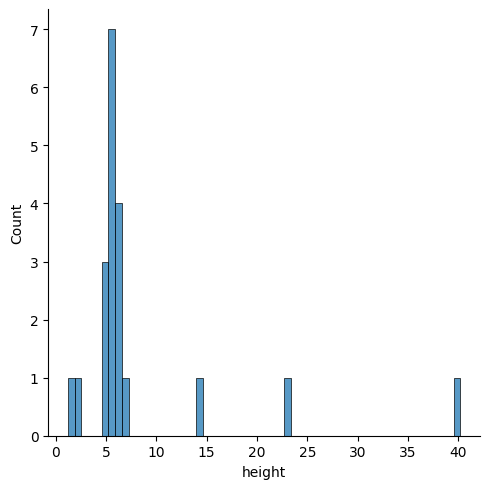

In [13]:
#ডেটার মানগুলো কীভাবে ছড়ানো আছে সেটা বোঝা যায়।
sns.displot(df['height'])

<Axes: ylabel='height'>

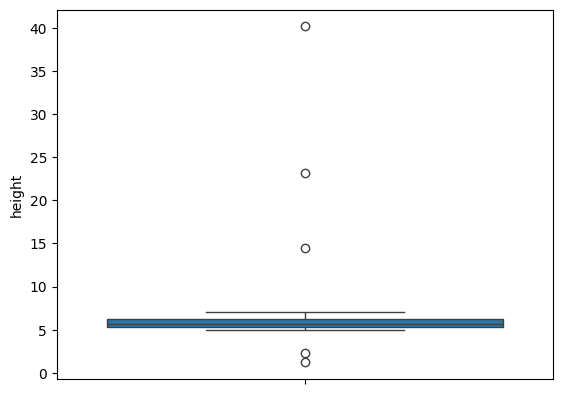

In [14]:
#detect outliers using IQR
sns.boxplot(y="height", data=df)

<Axes: >

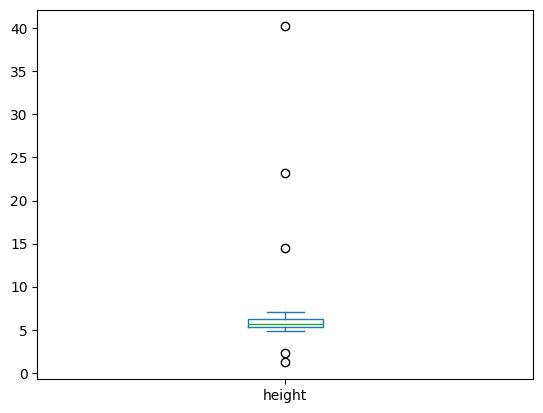

In [15]:
df['height'].plot.box()

In [18]:
Q1 = df['height'].quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1,Q3

(np.float64(5.3500000000000005), np.float64(6.275))

In [19]:
IQR = Q3 - Q1
IQR

np.float64(0.9249999999999998)

In [20]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit


(np.float64(3.962500000000001), np.float64(7.6625))

In [21]:
#here are the outlier
out = df[(df['height'] < lower_limit) | (df['height'] > upper_limit)]
out

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


In [23]:
#remonve outliers
df_no_outliers = df[(df.height >= lower_limit) & (df.height<=upper_limit)]
df_no_outliers

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


<Axes: xlabel='height'>

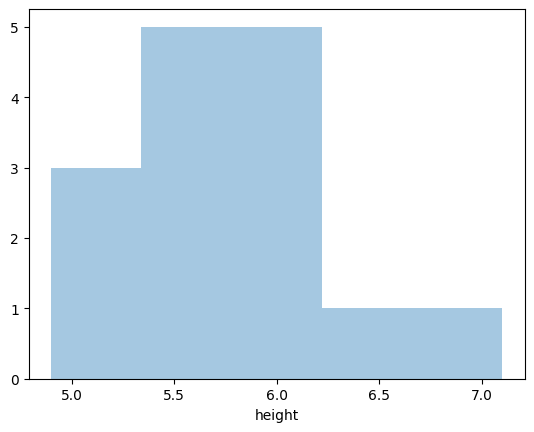

In [26]:
sns.distplot(df_no_outliers['height'], kde=False)